# Topics of Datasets on Kaggle
> **Date:** 14.05. *(Due: 14.05.)*  
> **Name:** `AlVy` Alyona Vyshnevska  
> **Session:** [Introduction](../index)   
> **Code:** [here]()   

----
Let's find out id we can group descriptions of Kaggle datasets by topics. 

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel as ldamodel
from gensim import corpora, models
import pandas as pd
import gensim
import pprint
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from collections import Counter

### Dataset

Upvoted Kaggle datasets, collected on 21 Feb 2018. 2885 datasets. 

In [9]:
# Input from csv
df = pd.read_csv('voted-kaggle-dataset.csv')

In [10]:
df.shape

(2885, 15)

The visualisation used later on could not cope with the number of documents (descriptions).  
Therefore, I have taken a subset of the dataset: 100 documents

In [12]:
df = df['Description'][:100]

# sample data
print(df.head())

0    The datasets contains transactions made by cre...
1    The ultimate Soccer database for data analysis...
2    Background\nWhat can we say about the success ...
3    This dataset is simulated\nWhy are our best an...
4    Context\nInformation on more than 170,000 Terr...
Name: Description, dtype: object


### Data Pre-Processing

- Remove stop words: extend stop words with words that are common in all documents. These appear as important words for the topics,
however they do not convey any interesting information for our puproses. 

In [13]:
stop_words = stopwords.words('english')
stop_words.extend(['content', 'context', 'number', 'file', 'yet', 'user', 'year', 'name', 'column', 'row',
                   'dataset', 'data', 'database', 'from', 'subject', 're', 'numeric', 'integer', 'strongly', 'csv',
                   'edu', 'use', 'not', 'would', 'say', 'text', 'contains', 'file', 
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need',
                   'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
lemmatizer = WordNetLemmatizer()

In [14]:
texts = []

# loop through document list
for i in df.iteritems():
    # clean and tokenize document string
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if raw not in stop_words]

    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(toks) for toks in stopped_tokens]

    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if len(raw) > 1]

    # add tokens to list
    texts.append(new_lemma_tokens)

In [15]:
# turn our tokenized documents into a id <-> term dictionary
dictionary_small = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus_small = [dictionary_small.doc2bow(text) for text in texts]

### Train model
- Number of topics: 10 (arbitrary choice)
- Save model for later use

In [ ]:
# lda_model_small = ldamodel(corpus_small, num_topics=10, id2word = dictionary_small)
# temp_file_small = datapath("model_small")
# lda.save(temp_file)

In [16]:
# Load a pretrained model from disk.
temp_file_small = datapath("model_small")
lda_model_small = ldamodel.load(temp_file_small)

In [17]:
pprint.pprint(lda_model_small.top_topics(corpus_small,topn=5))

[([(0.0070124622, 'temperature'),
   (0.0066581047, 'land'),
   (0.0054631988, 'time'),
   (0.0048985686, 'global'),
   (0.0044036866, 'average')],
  -0.7613324978748974),
 ([(0.0071108276, 'match'),
   (0.005040633, 'time'),
   (0.004087753, 'using'),
   (0.0038950795, 'interested'),
   (0.0037203531, 'disagree')],
  -1.6689905360908845),
 ([(0.006198859, 'match'),
   (0.005881827, 'talk'),
   (0.005179451, 'time'),
   (0.0043938397, 'com'),
   (0.004318927, 'team')],
  -3.288828789007037),
 ([(0.007737329, 'movie'),
   (0.0050231703, 'type'),
   (0.004887914, 'file'),
   (0.0041449354, 'player'),
   (0.0037647008, 'time')],
  -3.519297365867545),
 ([(0.005672491, 'movie'),
   (0.0056265453, 'school'),
   (0.005396142, 'student'),
   (0.004901688, 'id'),
   (0.0047711483, 'payment')],
  -6.143191443587957),
 ([(0.006544679, 'time'),
   (0.0065135895, 'rating'),
   (0.0051556975, 'world'),
   (0.0047648647, 'ranking'),
   (0.0046712444, 'university')],
  -6.813111104998756),
 ([(0.0102

### Visualize

In [18]:
prepared = pyLDAvis.gensim.prepare(lda_model_small, corpus_small, dictionary_small)
pyLDAvis.display(prepared)
# pyLDAvis.show(prepared)

/Users/alyona/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Discuss
So what do we observe?

There is one clear cluster of topics, which accounts for about 60% of tokens.   
Topic one is mostly dissimilar to all other topics, while topics three, seven and eight are a little bit further away from the cluster.  

Overall, words 'temperature', 'disagree', and 'land' are deemed to be the most salient for the topcis.  
**Time** is the most frequent term. 

Topic ten is completely contained within topic two, therefor one can reduce the number of topics to 9. 

### Future Work

With removing words common to all topics I practically tried what tf-idf does. I did not find a way to utilize tf-idf within gensim LDA model training, however I have not found it. 

In [ ]:
# pyLDAvis.show(prepared)

In [ ]:
# pyLDAvis.prepared_data_to_html(prepared, 'vis_topic_model_01.html')

In [ ]:
pyLDAvis.save_html(prepared, 'vis_topic_model_02.html')

ValueError: not enough values to unpack (expected 3, got 1)

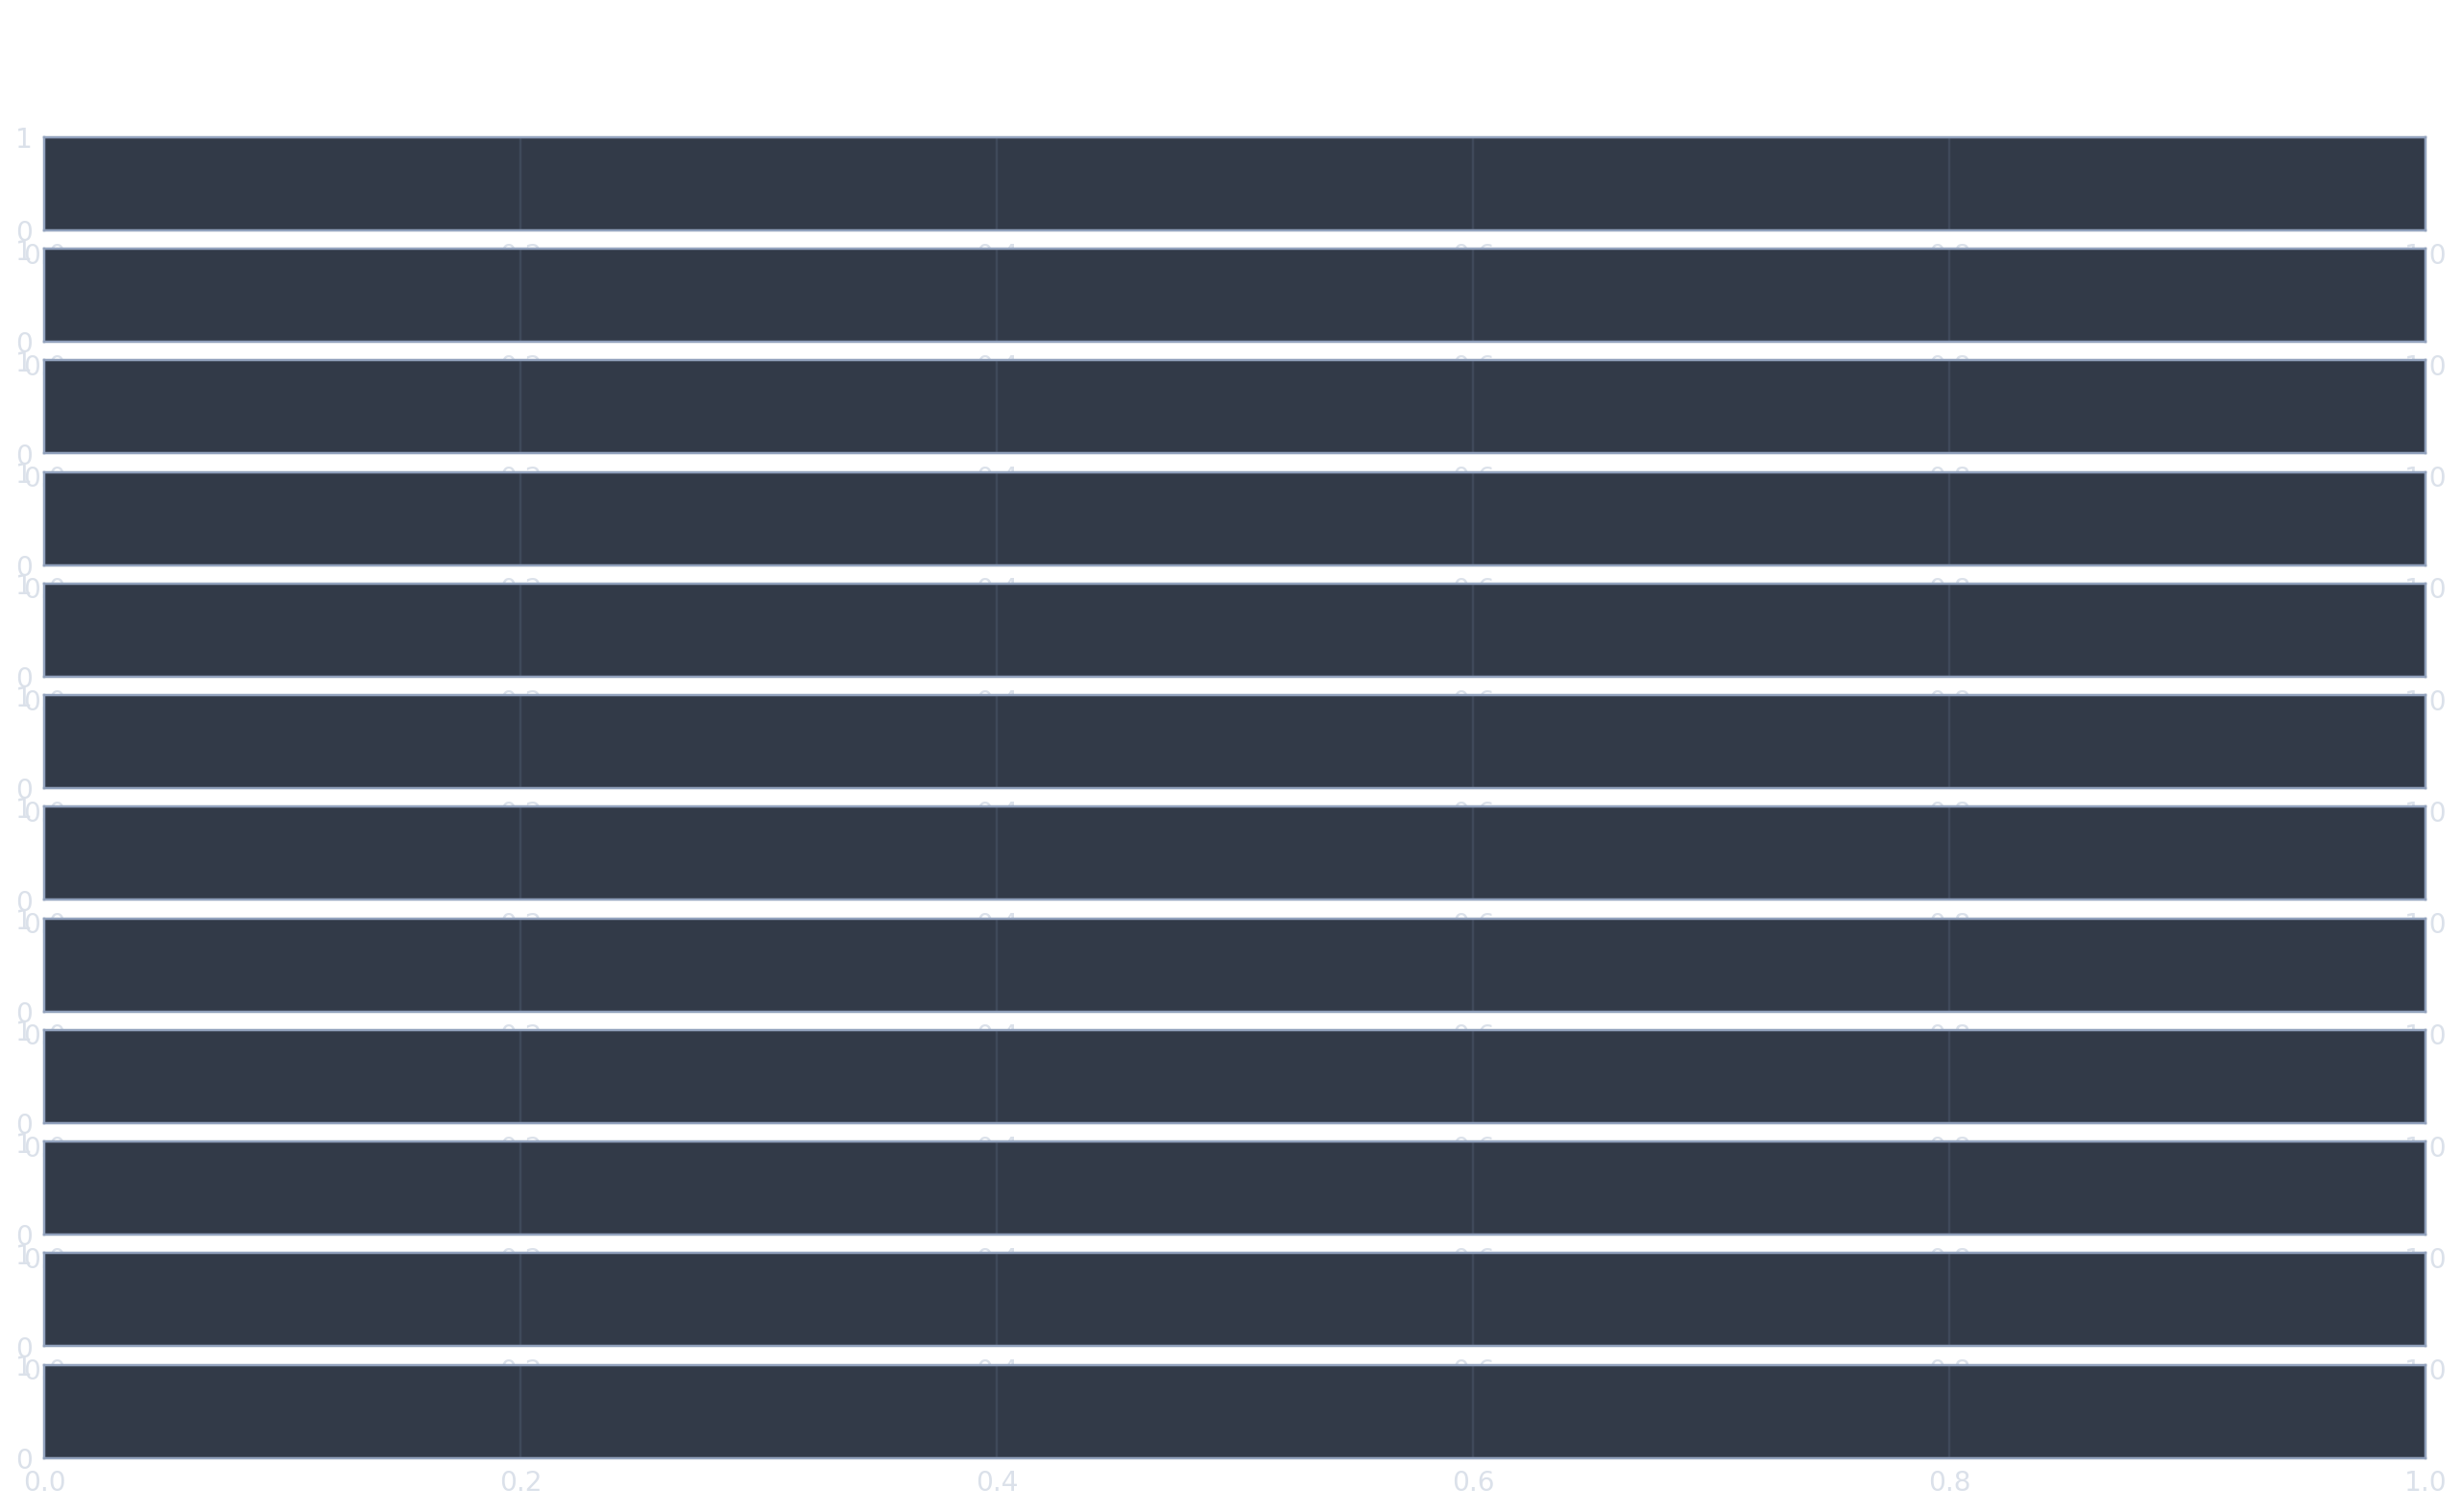

In [21]:
# Sentence Coloring of N Sentences
def sentences_chart(lda_model=lda_model_small, corpus=corpus_small, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    